A SUPERSTORE GIANT SEEKS TO FIND OUT FACTORS DEBILITATING AGAINST THEIR BUSINESS AND WHAT WORKS BEST FOR THEM. THEY WOULD ALSO LIKE TO UNRAVEL WAYS TO OPTIMIZE SALES AND PROFIT.

START BY IMPORTING ANALYTICS AND MODEL DEPENDENCIES

In [591]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy import stats

IMPORT DATASET

In [592]:
sales_data = pd.read_csv("sales_data.csv",encoding='cp1252')

VISUALIZE THE FIRST 5 ROWS OF THE IMPORTED DATASET

In [593]:
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [594]:
print("Number of data points is : ", len(sales_data))

Number of data points is :  9994


INFORMATION ON THE FEATURES:

In [595]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

DATASET HAS THE FOLLOWING COLUMNS:

In [596]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

RENAME COLUMNS FOR EASIER CROSS-EXAMINATION:

In [597]:
sales_data = sales_data.rename(columns={'Row ID':'row_id','Order ID':'order_id','Order Date':'order_date','Ship Date':'ship_date','Ship Mode':'ship_mode','Customer ID':'customer_id','Customer Name':'customer_name','Segment':'segment','Country':'country','City':'city','State':'state','Postal Code':'postal_code','Region':'region','Product ID':'product_id','Category':'category','Sub-Category':'sub_category','Product Name':'product_name','Sales':'sales','Quantity':'quantity','Discount':'discount','Profit':'profit'})

CONFIRM THAT RENAMING WAS SUCCESSFUL:

In [598]:
sales_data.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


DROP THE ROW_ID SINCE IT'S INSIGNIFICANT:

In [599]:
sales_data = sales_data.drop(['row_id','order_id'],axis=1)

FIND NUMBER OF DAYS BETWEEN WHEN ORDERS WERE PLACED AND DELIVERED

In [600]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

In [601]:
sales_data['ship_date'] = pd.to_datetime(sales_data['ship_date'])

In [602]:
sales_data['delivery_days'] = (sales_data['ship_date'] - sales_data['order_date']).dt.days

DEFINE THE "PRICE_PER_ITEM" SINCE IT WAS NEVER PROVIDED:

In [603]:
sales_data['price_per_item'] = sales_data['sales'] / sales_data['quantity']

SEE TOTAL EXPENDITURES

In [604]:
sales_data['spent'] = sales_data['sales'] * sales_data['quantity']

VIEW THE NUMERICAL COLUMNS:

In [605]:
numerical_columns = sales_data.select_dtypes(include=np.number).columns

In [606]:
numerical_columns

Index(['postal_code', 'sales', 'quantity', 'discount', 'profit',
       'delivery_days', 'price_per_item', 'spent'],
      dtype='object')

CURRENT SHAPE OF DATASET: Next line shows that dataset has got 9994 rows and 22 columns(features):

In [607]:
sales_data.shape

(9994, 22)

THE FOLLOWING PLOT SHOWS POSSIBLE OUTLIERS ON THE QUANTITY DEMANDED THUS FAR:

<Axes: >

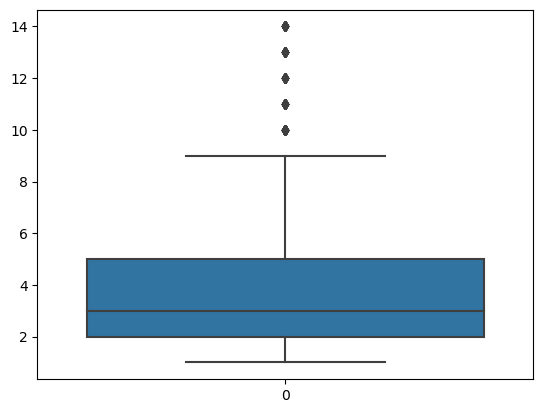

In [608]:
sns.boxplot(sales_data['quantity'])

CHECK FOR UNIFORM DISTRIBUTION ACROSS THE NUMERICAL COLUMNS

array([[<Axes: title={'center': 'postal_code'}>,
        <Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'discount'}>,
        <Axes: title={'center': 'profit'}>,
        <Axes: title={'center': 'delivery_days'}>],
       [<Axes: title={'center': 'price_per_item'}>,
        <Axes: title={'center': 'spent'}>, <Axes: >]], dtype=object)

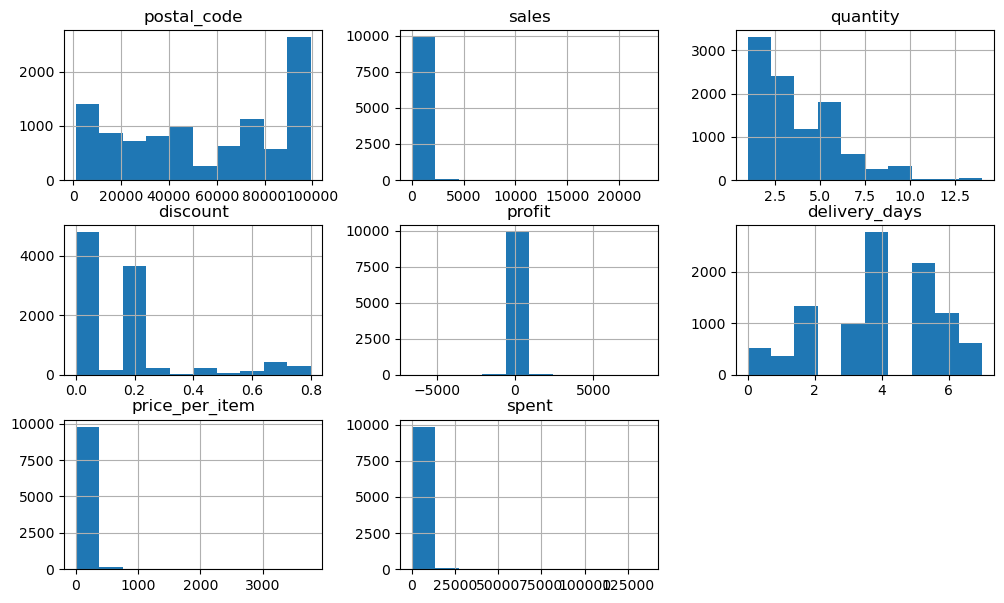

In [609]:
sales_data[numerical_columns].hist(bins=10,figsize=(12,7))

QUANTITY IS "SCEWED-RIGHT" DUE TO LOWER BOUND DISTRIBUTION COMPARED TO THE ELEMENTS OF THE DATASET - THIS IS DUE TO CONSTRAINS IMPOSED ON PRICES AND DISCOUNTS FROM THE OBVIOUS SINGLE CATEGORY OF CUSTOMERS ON THE "SALE" CHART. THIS IS LIKELY DUE TO THE FACT THAT OTHER CATEGORIES OF CUSTOMERS ARE NOT GETTING AS MUCH DISCOUNT AS EVIDENT ON THE DISCOUNT CHAT AND CALLS FOR A REVISION OF DISOUNT INCENTIVES ALLOTTED TO CUSTOMERS ACROSS BOARD

ESTABLISH EXISTING CORRELATION BETWEEN THE NUMERIC VALUES

In [610]:
sales_data[numerical_columns].corr()

,postal_code,sales,quantity,discount,profit,delivery_days,price_per_item,spent
postal_code,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.009771,-0.024652,-0.022614
sales,-0.023854,1.000000,0.200795,-0.028190,0.479064,-0.007354,0.889376,0.914255
quantity,0.012761,0.200795,1.000000,0.008623,0.066253,0.018298,-0.003148,0.331015
discount,0.058443,-0.028190,0.008623,1.000000,-0.219487,0.000408,-0.032803,-0.024939
profit,-0.029961,0.479064,0.066253,-0.219487,1.000000,-0.004649,0.468312,0.410029
delivery_days,-0.009771,-0.007354,0.018298,0.000408,-0.004649,1.000000,-0.013390,-0.002577
price_per_item,-0.024652,0.889376,-0.003148,-0.032803,0.468312,-0.013390,1.000000,0.666229
spent,-0.022614,0.914255,0.331015,-0.024939,0.410029,-0.002577,0.666229,1.000000


C:\Users\Hunter\AppData\Local\Temp\ipykernel_2664\1534672046.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_data.corr(),cmap='bwr',annot=True)


<Axes: >

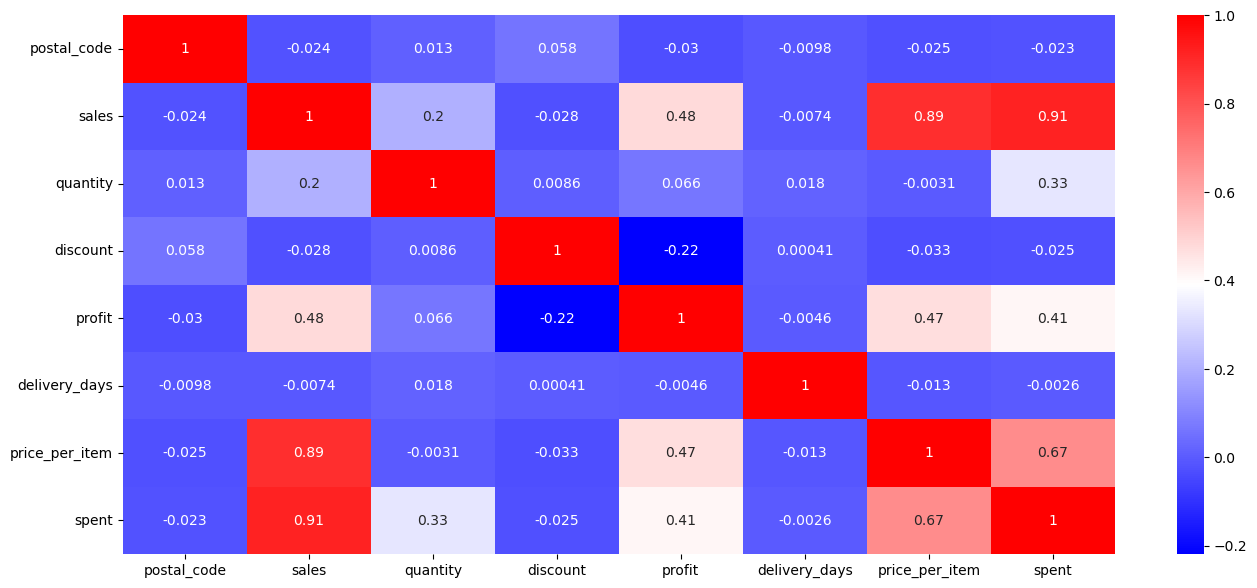

In [611]:
plt.figure(figsize=(16,7))
sns.heatmap(sales_data.corr(),cmap='bwr',annot=True)

THERE IS CLEARLY A POSITIVE INVERSE CORRELATION BETWEEN "SALES" AND "SPENT" BUT IT'S WORTH KNOWING THAT THIS IS ONLY BASED ON A SINGLE CATEGORY OF CUSTOMERS DUE TO DISCOUNT BIASES

EXPLORE CATEGORICAL FEATURES

In [612]:
sales_data = sales_data.drop('country',axis=1)
sales_data = sales_data.drop('customer_id',axis=1)
sales_data = sales_data.drop('product_id',axis=1)
sales_data = sales_data.drop('order_date',axis=1)
sales_data = sales_data.drop('ship_date',axis=1)
sales_data = sales_data.drop('customer_name',axis=1)

In [613]:
categrical_columns = list(set(sales_data) - set(numerical_columns))

In [614]:
categrical_columns

['state',
 'segment',
 'city',
 'category',
 'region',
 'product_name',
 'ship_mode',
 'sub_category']

SEE VARIOUS "ship_mode" CATEGORIES AND THEIR NUMBER OF OCCURENCE ON THE DATASET:

In [615]:
sales_data['ship_mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: ship_mode, dtype: int64

SEE VARIOUS "segment" CATEGORIES AND THEIR NUMBER OF OCCURENCE ON THE DATASET:

In [616]:
sales_data['segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: segment, dtype: int64

SEE VARIOUS "category" FACETS AND THEIR NUMBER OF OCCURENCE ON THE DATASET:

In [617]:
sales_data['category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: category, dtype: int64

SEE VARIOUS "SUB_CATEGORY" FACETS AND THEIR NUMBER OF OCCURENCE ON THE DATASET:

In [618]:
sales_data['sub_category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: sub_category, dtype: int64

VISUALIZE THE DISTRIBUTIION OF CATEGORICAL FEATURES

CLOSELY EXAMINE THE RELATIONSHIP BETWEEN "PRODUCTS' CATEGORIES" AND SALES

<Axes: xlabel='category', ylabel='sales'>

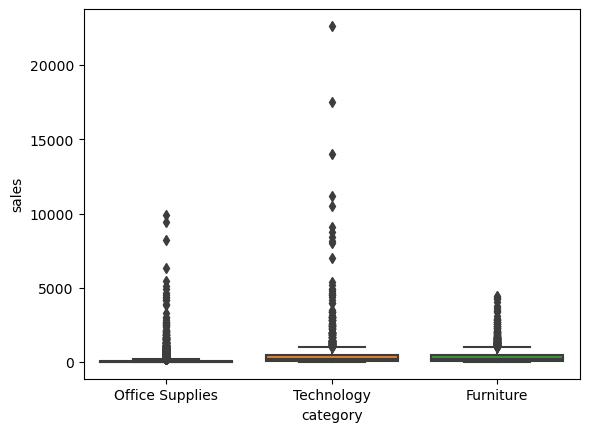

In [619]:
sorted_furnishes = sales_data.groupby(['category'])['sales'].median().sort_values()
sns.boxplot(x=sales_data['category'],y=sales_data['sales'],order=list(sorted_furnishes.index))

THE ABOVE SHOWS THAT THERE HAS NOT BEEN A CORRESPONDING PERFORMANCE ON SALES OF OFFICE SUPPLIES AND FURNITURE AS TECHNOLOGY PRODUCTS

CLOSELY EXAMINE THE RELATIONSHIP BETWEEN "CUSTOMER SEGMENT" AND SALES

<Axes: xlabel='segment', ylabel='sales'>

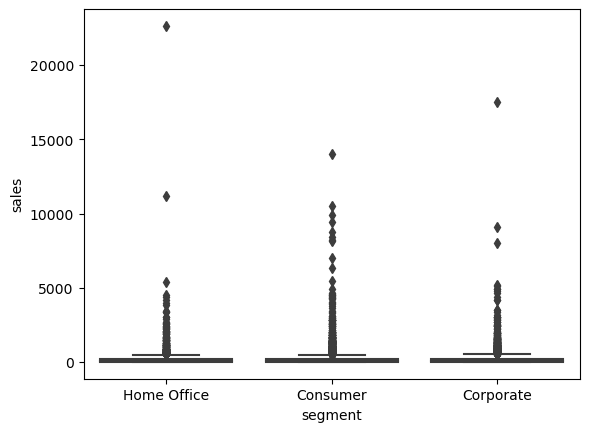

In [620]:
sorted_furnishes = sales_data.groupby(['segment'])['sales'].median().sort_values()
sns.boxplot(x=sales_data['segment'],y=sales_data['sales'],order=list(sorted_furnishes.index))

THE ABOVE PLOT SHOWS THAT MARKETING AND DISCOUNT INCENTIVE EFFORTS NEED BE SPREAD TOWARDS HOME OFFICE AND CORPORATE SEGMENTS OF CUSTOMERS.

ENCODE CATEGORICAL FEATURES:

In [621]:
sales_data['category'] = sales_data['category'].replace({'Office Supplies':0,'Furniture':1,'Technology':2})

In [622]:
sales_data['segment'] = sales_data['segment'].replace({'Consumer':0,'Corporate':1,'Home Office':2})

In [623]:
sales_data['ship_mode'] = sales_data['ship_mode'].replace({'Standard Class':0,'Second Class':1,'First Class':2,'Same Day':3})

In [624]:
sales_data['region'] = sales_data['region'].replace({'West':0,'East':1,'Central':2,'South':3})

CONVERT DATASET INTO A "csv" FILE

In [625]:
sales_data.to_csv('new_sales_data.csv',header=True)

SEE THE FIRST 5 ROWS AFTER ENCODING:

In [626]:
sales_data.head()

,ship_mode,segment,city,state,postal_code,region,category,sub_category,product_name,sales,quantity,discount,profit,delivery_days,price_per_item,spent
0,1,0,Henderson,Kentucky,42420,3,1,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,130.9800,523.9200
1,1,0,Henderson,Kentucky,42420,3,1,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.9800,2195.8200
2,1,1,Los Angeles,California,90036,0,0,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,7.3100,29.2400
3,0,0,Fort Lauderdale,Florida,33311,3,1,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,191.5155,4787.8875
4,0,0,Fort Lauderdale,Florida,33311,3,0,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,11.1840,44.7360


WORK ON ENCODING OTHER CATEGORICAL FEATURES:

In [627]:
other_cat_features = sales_data[['city','state','product_name','sub_category']]

MAKE A COPY OF THE DATASET

In [628]:
alternate_data = sales_data.copy()

"LABELENCODER" UTILITY BILLED TO ENCODE OTHER CATEGORICAL FEATURES:

In [629]:
LE = LabelEncoder()

In [630]:
for feature in other_cat_features:
    alternate_data[feature] = alternate_data[[feature]].apply(LE.fit_transform)

VIEW FIRST 5 ROWS OF NEWLY COPIED DATASET

In [631]:
alternate_data.head()

,ship_mode,segment,city,state,postal_code,region,category,sub_category,product_name,sales,quantity,discount,profit,delivery_days,price_per_item,spent
0,1,0,194,15,42420,3,1,4,386,261.9600,2,0.00,41.9136,3,130.9800,523.9200
1,1,0,194,15,42420,3,1,5,839,731.9400,3,0.00,219.5820,3,243.9800,2195.8200
2,1,1,266,3,90036,0,0,10,1433,14.6200,2,0.00,6.8714,4,7.3100,29.2400
3,0,0,153,8,33311,3,1,16,366,957.5775,5,0.45,-383.0310,7,191.5155,4787.8875
4,0,0,153,8,33311,3,0,14,573,22.3680,2,0.20,2.5164,7,11.1840,44.7360


IDENTITY OUTLIERS:

In [632]:
Q1 = alternate_data.quantile(0.25)
Q3 = alternate_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ship_mode             1.00000
segment               1.00000
city                230.00000
state                32.00000
postal_code       66785.00000
region                2.00000
category              1.00000
sub_category          9.00000
product_name        915.75000
sales               192.66000
quantity              3.00000
discount              0.20000
profit               27.63525
delivery_days         2.00000
price_per_item       58.47000
spent               714.50800
dtype: float64


REMOVE OUTLIERS:

In [633]:
alternate_data = alternate_data[~((alternate_data < (Q1 - 1.5 * IQR)) |(alternate_data > (Q3 + 1.5 * IQR))).any(axis=1)]
alternate_data.shape

(6544, 16)

DEFINE TRAINING DATA

In [634]:
training_data = alternate_data.drop('sales',axis=1)

DEFINE TEST DATA

In [635]:
test_data = alternate_data['sales']

SCALE THE DATASET FOR EVEN DISTRIBUTION OF VALUES:

In [636]:
scaler = StandardScaler()

In [637]:
scaler.fit(training_data)

StandardScaler()

In [638]:
scaled_data = pd.DataFrame(scaler.transform(training_data),columns= training_data.columns )

SEE FIRST 5 ROWS OF SCALED DATASET:

In [639]:
scaled_data.head()

,ship_mode,segment,city,state,postal_code,region,category,sub_category,product_name,quantity,discount,profit,delivery_days,price_per_item,spent
0,0.618536,-0.867606,-0.671276,-0.440174,-0.387899,1.679179,0.661891,-0.732792,-1.000416,-0.759589,-0.896115,1.768666,-0.784471,3.725596,0.888069
1,0.618536,0.448485,-0.147753,-1.214778,1.060774,-1.096174,-0.651455,0.470468,0.881815,-0.759589,-0.896115,-0.342192,-0.125475,-0.554878,-0.681353
2,-0.702946,-0.867606,-0.969393,-0.892026,-0.665032,1.679179,-0.651455,1.272641,-0.664239,-0.759589,0.993452,-0.604527,1.851514,-0.420790,-0.632190
3,-0.702946,-0.867606,-0.147753,-1.214778,1.060652,-1.096174,0.661891,0.269924,-0.669632,1.949267,-0.896115,0.097422,0.533521,-0.566299,0.310973
4,-0.702946,-0.867606,-0.147753,-1.214778,1.060652,-1.096174,-0.651455,-1.133879,0.335303,0.323953,-0.896115,-0.637706,0.533521,-0.744898,-0.681734


SPLIT DATA INTO TRAINING AND TEST OR UNSEEN DATASET

In [640]:
from sklearn.model_selection import train_test_split

In [641]:
x_train,x_test, y_train, y_test = train_test_split(training_data,test_data, test_size =0.20, random_state = 3)

BUILD MODEL:

In [642]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

MAKE PREDICTIONS BASED ON UNSEEN DATASET

In [643]:
y_pred = regressor.predict(x_test)

In [644]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.9692849038358143

THE ABOVE METRIC POINTS TO SOME DECENT MODEL PERFORMANCE BUT TRY "LASSO" AND "RIDGE" REGRESSION MODELS:

In [645]:
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(alpha = 0.9)
ls.fit(x_train, y_train)

Lasso(alpha=0.9)

In [646]:
ls_pred = ls.predict(x_test)

In [647]:
pd.DataFrame({'y_test':y_test,'predicted':ls_pred})

,y_test,predicted
4338,113.820,101.314867
4402,11.328,12.101884
4439,23.680,19.422348
2902,23.120,18.616446
4840,27.580,27.682235
...,...,...
5580,47.520,60.185481
4442,29.200,25.122608
7735,19.440,16.390659
6466,68.460,77.825506


In [648]:
r2_score(y_test,ls_pred)

0.9693809535995106

THE ABOVE METRIC POINTS TO A BETTER LASSO REGRESSION MODEL PERFORMANCE THAN THE FIRST BUT GIVE RIDGE REGRESSION A TRY:

In [649]:
rr = Ridge(alpha = 0.009)
rr.fit(x_train, y_train)

Ridge(alpha=0.009)

In [650]:
rr_pred = rr.predict(x_test)

In [651]:
r2_score(y_test, y_pred)

0.9692849038358143

THE ABOVE METRIC POINTS TO A RELATIVELY DECENT RIDGE REGRESSION MODEL PERFORMANCE BUT NOT BETTER THAN LASSO'S, SO STICK WITH LASSO REGRESSION MODEL(ls)

VIEW PREDICTED "sale" VALUES OF LASSO REGRESSION:

In [652]:
training_data_prediction = ls.predict(x_train)

In [653]:
training_data_prediction

array([ 20.87958221,  13.28320423, 101.51097569, ...,  29.85902353,
       133.70748062,  37.94806309])

VISUALIZE THE AWESOME PERFORMANCE OF THE LASSO REGRESSION MODEL ON THE TRAINING DATASET:

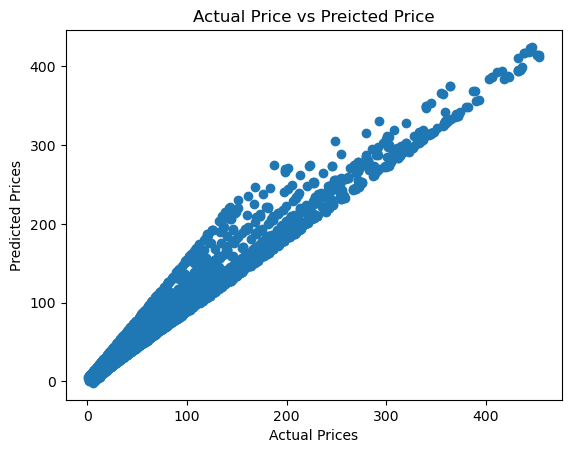

In [654]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

VISUALIZE THE AWESOME PERFORMANCE OF THE LASSO REGRESSION MODEL ON THE TEST DATASET WHICH SHOWS CLEARLY THAT THE ONE-SIDED BIAS HAS BEEN NULLLIFIED:

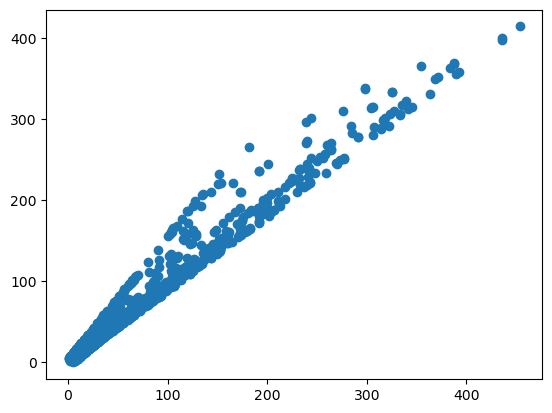

In [655]:
plt.scatter(y_test,ls_pred)

SO FAR, WE'VE FACTORED PROFIT MARGIN IN BUILDING THE MODEL, THEREBY STIICKING WITH STATUSQUO ON GAINS AS WELL AS CLOSING THE GAP ON UNEVEN DISCOUNT APPROPRIATION AND OPTIMIZING SALES ACROSS ALL SPHERES OF CUSTOMERS.

REASSIGN TEST DATASET TO THE VARIABLE "unseen_data" AS A FIRST STEP TO CONFIRMING THE MODELS'S PERFORMANCE ON SPREADING DISCOUNT OFFERINGS THROUGH ADJUSTMENT OF SALE PRICES:

In [656]:
unseeen_data = x_test

CREATE A NEW COLUMN CALLED "new_sales" TO REPRESENT THE NEW SALES PRICE WHICH INCORPORATES THE EVEN SPREAD IN DISCOUNT:

In [657]:
unseeen_data['new_sales'] = ls_pred

DEFINE THE NEW PRICES FOR EACH ITEM GOING FORWARD:

In [658]:
unseeen_data['new_price_per_item'] = unseeen_data['new_sales'] / unseeen_data['quantity']

A TABULAR REPRESENTATION WHICH SHOWS A REVAMP OF BUSINESS MODEL IN EFFORTS TO TWEAKING CUSTOMER BEHAVIOUR TOWARDS IMPROVED PATRONAGE:

In [659]:
unseeen_data

,ship_mode,segment,city,state,postal_code,region,category,sub_category,product_name,quantity,discount,profit,delivery_days,price_per_item,spent,new_sales,new_price_per_item
4338,0,2,266,3,90049,0,0,12,1456,3,0.0,53.4954,4,37.940,341.460,101.314867,33.771622
4402,2,0,92,4,80906,0,0,2,1373,2,0.2,2.5488,1,5.664,22.656,12.101884,6.050942
4439,0,0,385,41,77642,2,0,12,929,4,0.2,7.4000,6,5.920,94.720,19.422348,4.855587
2902,0,0,80,11,60610,2,0,12,1768,5,0.2,8.3810,5,4.624,115.600,18.616446,3.723289
4840,0,2,194,15,42420,3,1,9,31,2,0.0,11.5836,5,13.790,55.160,27.682235,13.841118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,1,0,266,3,90004,0,0,12,162,9,0.0,22.8096,5,5.280,427.680,60.185481,6.687276
4442,0,0,516,20,48185,2,0,2,254,5,0.0,10.5120,4,5.840,146.000,25.122608,5.024522
7735,0,1,452,45,98105,0,0,12,1797,3,0.0,9.3312,4,6.480,58.320,16.390659,5.463553
6466,1,0,266,3,90008,0,2,0,1057,7,0.0,25.3302,3,9.780,479.220,77.825506,11.117929


TOTAL SALES OBTAINED FROM TEST DATASET WITHOUT INCORPORATE THE MODEL

In [660]:
int(sum(y_test))

85324

TOTAL SALES OBTAINED FROM TEST DATASET AFTER INCORPORATING THE MODEL:

In [661]:
int(sum(unseeen_data['new_sales']))

85741